In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("Auta_uhlikova_stopa.csv", index_col="Model")
df = df.apply(pd.to_numeric, errors="coerce")
df.head()

,Vykon_kW,Baterie_kWh,Vyrobni_emise_kg,Spotreba_100_km,Emise_CO2_g_km
Model,,,,,
Skoda Scala TSI,81,0.0,6000,4.7,111.00
Skoda Scala TDI,85,0.0,6000,4.4,126.00
Hyundai Kona,111,48.4,16000,14.6,68.11


In [2]:
annual_emissions = pd.read_csv(
    "Annual Emmissions Development.csv",
    index_col=0,
    header=None,
    skiprows=1,
    names=["emissions_per_kwh"],
)

annual_emissions.index = annual_emissions.index.astype(int)


# annual_emissions = annual_emissions.apply(pd.to_numeric, errors="coerce")


# annual_emissions = annual_emissions.rename(


#     columns={"Unnamed: 0": "rok", "0": "emissions_per_kwh"}


# )


# annual_emissions = annual_emissions.loc[2023:2030]
annual_emissions

,emissions_per_kwh
2014,0.501099
2015,0.499158
2016,0.501063
2017,0.504227
2018,0.504320
2019,0.497428
2020,0.484564
2021,0.473826
2022,0.471351
2023,0.466487


In [3]:
annual_mileage = [10000, 15000, 20000]

for mileage in annual_mileage:
    df[f"Najezd_{mileage}"] = df["Vyrobni_emise_kg"] + (
        mileage / 1000 * df["Emise_CO2_g_km"]
    )
df

,Vykon_kW,Baterie_kWh,Vyrobni_emise_kg,Spotreba_100_km,Emise_CO2_g_km,Najezd_10000,Najezd_15000,Najezd_20000
Model,,,,,,,,
Skoda Scala TSI,81,0.0,6000,4.7,111.00,7110.0,7665.00,8220.0
Skoda Scala TDI,85,0.0,6000,4.4,126.00,7260.0,7890.00,8520.0
Hyundai Kona,111,48.4,16000,14.6,68.11,16681.1,17021.65,17362.2


In [4]:
# car_emissions = pd.DataFrame(columns=list(range(2023, 2031)))

car_emissions = pd.DataFrame(index=df.index, columns=range(2023, 2031))


car_emissions

,2023,2024,2025,2026,2027,2028,2029,2030
Model,,,,,,,,
Skoda Scala TSI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Skoda Scala TDI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hyundai Kona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
cars = ["Skoda Scala TSI", "Skoda Scala TDI", "Hyundai Kona"]

for car in cars:
    car_emissions.loc[car] = 0

car_emissions

,2023,2024,2025,2026,2027,2028,2029,2030
Model,,,,,,,,
Skoda Scala TSI,0,0,0,0,0,0,0,0
Skoda Scala TDI,0,0,0,0,0,0,0,0
Hyundai Kona,0,0,0,0,0,0,0,0


In [6]:
car_emissions_10000 = car_emissions

In [7]:
# for car in cars:
#     for year in car_emissions_10000.columns:
#         emissions_per_km = df.loc[car]["Emise_CO2_g_km"]
#         production_emissions = df.loc[car]["Vyrobni_emise_kg"]
#         car_emissions_10000.loc[car][year] = (
#             emissions_per_km * 10000 + production_emissions
#         )

# car_emissions_10000

In [8]:
for car in cars:
    for year in car_emissions_10000.columns:
        emissions_per_km = df.loc[car]["Emise_CO2_g_km"]
        production_emissions = df.loc[car]["Vyrobni_emise_kg"]
        car_emissions_10000.loc[car][year] = round(
            emissions_per_km * (year - 2022) * 10000 / 1000 + production_emissions, 2
        )
car_emissions_10000

,2023,2024,2025,2026,2027,2028,2029,2030
Model,,,,,,,,
Skoda Scala TSI,7110.0,8220.0,9330.0,10440.0,11550.0,12660.0,13770.0,14880.0
Skoda Scala TDI,7260.0,8520.0,9780.0,11040.0,12300.0,13560.0,14820.0,16080.0
Hyundai Kona,16681.1,17362.2,18043.3,18724.4,19405.5,20086.6,20767.7,21448.8


In [9]:
# pd.set_option("display.float_format", "{:.2f}".format)

car_emissions_10000.loc["Hyundai Kona*"] = 0

cumulative_emissions = 0

for year in car_emissions_10000.columns:
    emissions_per_km = annual_emissions.loc[year]["emissions_per_kwh"] * 0.146

    cumulative_emissions += emissions_per_km * 10000

    if year == 2023:
        if "Hyundai Kona*" in df.index and "Vyrobni_emise_kg" in df.columns:
            production_emissions = df.loc["Hyundai Kona*"]["Vyrobni_emise_kg"]
        else:
            production_emissions = df.loc["Hyundai Kona"]["Vyrobni_emise_kg"]
        cumulative_emissions += production_emissions

    car_emissions_10000.loc["Hyundai Kona*"][year] = round(cumulative_emissions, 2)

car_emissions_10000

,2023,2024,2025,2026,2027,2028,2029,2030
Model,,,,,,,,
Skoda Scala TSI,7110.0,8220.0,9330.0,10440.0,11550.0,12660.0,13770.0,14880.0
Skoda Scala TDI,7260.0,8520.0,9780.0,11040.0,12300.0,13560.0,14820.0,16080.0
Hyundai Kona,16681.1,17362.2,18043.3,18724.4,19405.5,20086.6,20767.7,21448.8
Hyundai Kona*,16681.07,17348.72,17996.83,18619.56,19211.41,19767.34,20282.75,20753.6


Text(0.5, 1.0, 'Kumulované emise při ročním nájezdu 10.000 km (scénář WEM)')

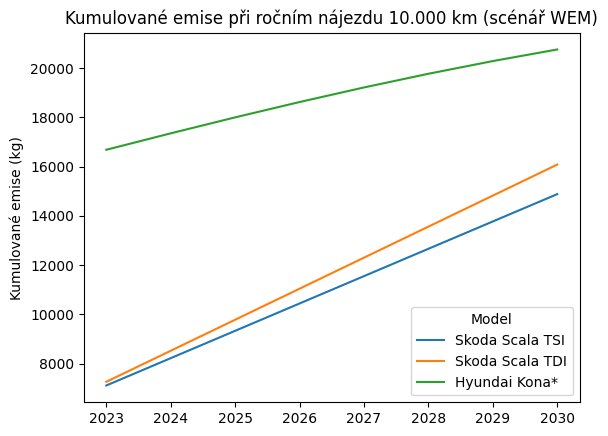

In [10]:
car_emissions_10000.drop("Hyundai Kona").transpose().plot()

plt.ylabel("Kumulované emise (kg)")
plt.title("Kumulované emise při ročním nájezdu 10.000 km (scénář WEM)")

In [11]:
car_emissions_10000.drop("Hyundai Kona").to_csv(
    "WEM_car_emissions_10000.csv", index=True
)

In [12]:
car_emissions_15000 = car_emissions

for car in cars:
    for year in car_emissions_15000.columns:
        emissions_per_km = df.loc[car]["Emise_CO2_g_km"]
        production_emissions = df.loc[car]["Vyrobni_emise_kg"]
        car_emissions_15000.loc[car][year] = round(
            emissions_per_km * (year - 2022) * 15000 / 1000 + production_emissions, 2
        )

car_emissions_15000

,2023,2024,2025,2026,2027,2028,2029,2030
Model,,,,,,,,
Skoda Scala TSI,7665.0,9330.0,10995.0,12660.0,14325.0,15990.0,17655.0,19320.0
Skoda Scala TDI,7890.0,9780.0,11670.0,13560.0,15450.0,17340.0,19230.0,21120.0
Hyundai Kona,17021.65,18043.3,19064.95,20086.6,21108.25,22129.9,23151.55,24173.2
Hyundai Kona*,16681.07,17348.72,17996.83,18619.56,19211.41,19767.34,20282.75,20753.6


In [13]:
car_emissions_15000.loc["Hyundai Kona*"] = 0

cumulative_emissions = 0

for year in car_emissions_15000.columns:
    emissions_per_km = annual_emissions.loc[year]["emissions_per_kwh"] * 0.146

    cumulative_emissions += emissions_per_km * 15000

    if year == 2023:
        if "Hyundai Kona*" in df.index and "Vyrobni_emise_kg" in df.columns:
            production_emissions = df.loc["Hyundai Kona*"]["Vyrobni_emise_kg"]
        else:
            production_emissions = df.loc["Hyundai Kona"]["Vyrobni_emise_kg"]
        cumulative_emissions += production_emissions

    car_emissions_15000.loc["Hyundai Kona*"][year] = round(cumulative_emissions, 2)

car_emissions_15000

,2023,2024,2025,2026,2027,2028,2029,2030
Model,,,,,,,,
Skoda Scala TSI,7665.0,9330.0,10995.0,12660.0,14325.0,15990.0,17655.0,19320.0
Skoda Scala TDI,7890.0,9780.0,11670.0,13560.0,15450.0,17340.0,19230.0,21120.0
Hyundai Kona,17021.65,18043.3,19064.95,20086.6,21108.25,22129.9,23151.55,24173.2
Hyundai Kona*,17021.61,18023.09,18995.25,19929.33,20817.11,21651.0,22424.13,23130.4


Text(0.5, 1.0, 'Kumulované emise při ročním nájezdu 15.000 km (scénář WEM)')

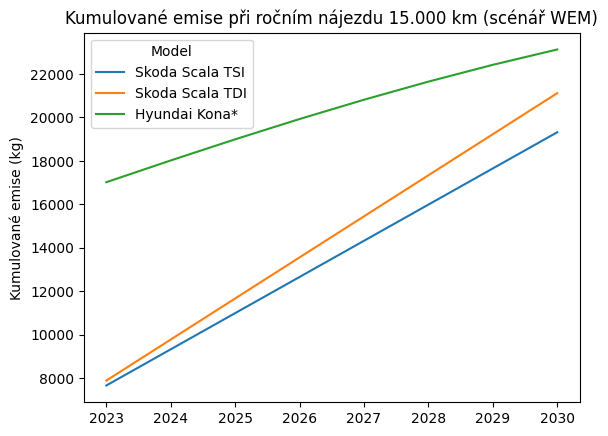

In [14]:
car_emissions_15000.drop("Hyundai Kona").transpose().plot()

plt.ylabel("Kumulované emise (kg)")
plt.title("Kumulované emise při ročním nájezdu 15.000 km (scénář WEM)")

In [15]:
car_emissions_15000.drop("Hyundai Kona").to_csv(
    "WEM_car_emissions_15000.csv", index=True
)

In [16]:
car_emissions_20000 = car_emissions

for car in cars:
    for year in car_emissions_15000.columns:
        emissions_per_km = df.loc[car]["Emise_CO2_g_km"]
        production_emissions = df.loc[car]["Vyrobni_emise_kg"]
        car_emissions_20000.loc[car][year] = round(
            emissions_per_km * (year - 2022) * 20000 / 1000 + production_emissions, 2
        )

car_emissions_20000

,2023,2024,2025,2026,2027,2028,2029,2030
Model,,,,,,,,
Skoda Scala TSI,8220.0,10440.0,12660.0,14880.0,17100.0,19320.0,21540.0,23760.0
Skoda Scala TDI,8520.0,11040.0,13560.0,16080.0,18600.0,21120.0,23640.0,26160.0
Hyundai Kona,17362.2,18724.4,20086.6,21448.8,22811.0,24173.2,25535.4,26897.6
Hyundai Kona*,17021.61,18023.09,18995.25,19929.33,20817.11,21651.0,22424.13,23130.4


In [17]:
car_emissions_20000.loc["Hyundai Kona*"] = 0

cumulative_emissions = 0

for year in car_emissions_20000.columns:
    emissions_per_km = annual_emissions.loc[year]["emissions_per_kwh"] * 0.146

    cumulative_emissions += emissions_per_km * 20000

    if year == 2023:
        if "Hyundai Kona*" in df.index and "Vyrobni_emise_kg" in df.columns:
            production_emissions = df.loc["Hyundai Kona*"]["Vyrobni_emise_kg"]
        else:
            production_emissions = df.loc["Hyundai Kona"]["Vyrobni_emise_kg"]
        cumulative_emissions += production_emissions

    car_emissions_20000.loc["Hyundai Kona*"][year] = round(cumulative_emissions, 2)

car_emissions_20000

,2023,2024,2025,2026,2027,2028,2029,2030
Model,,,,,,,,
Skoda Scala TSI,8220.0,10440.0,12660.0,14880.0,17100.0,19320.0,21540.0,23760.0
Skoda Scala TDI,8520.0,11040.0,13560.0,16080.0,18600.0,21120.0,23640.0,26160.0
Hyundai Kona,17362.2,18724.4,20086.6,21448.8,22811.0,24173.2,25535.4,26897.6
Hyundai Kona*,17362.14,18697.45,19993.67,21239.11,22422.82,23534.67,24565.51,25507.21


Text(0.5, 1.0, 'Kumulované emise při ročním nájezdu 20.000 km (scénář WEM)')

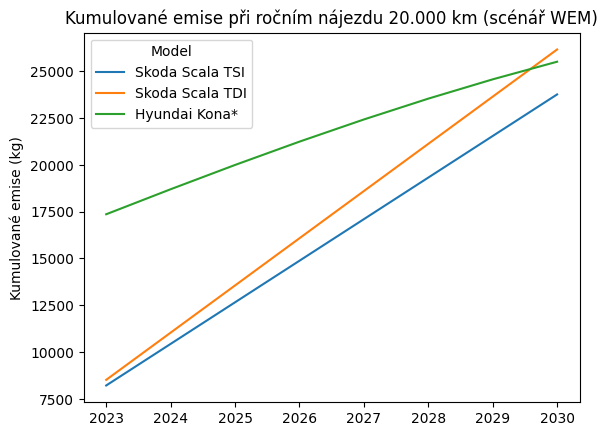

In [18]:
car_emissions_20000.drop("Hyundai Kona").transpose().plot()

plt.ylabel("Kumulované emise (kg)")
plt.title("Kumulované emise při ročním nájezdu 20.000 km (scénář WEM)")

In [19]:
car_emissions_20000.drop("Hyundai Kona").to_csv(
    "WEM_car_emissions_20000.csv", index=True
)